In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.read_csv("netflix_titles.csv")

In [42]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [43]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [44]:
data.shape

(8807, 12)

In [45]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [56]:
#Check Duplicate values
data.duplicated().sum()

np.int64(0)

In [48]:
#Drop columns
data.drop(columns="description", inplace=True)

In [49]:
data["release_year"]

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

In [50]:
#Drop null values by columns
data.dropna(subset="director", inplace=True)

In [51]:
#drop all null values
data.dropna(inplace=True)

In [52]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

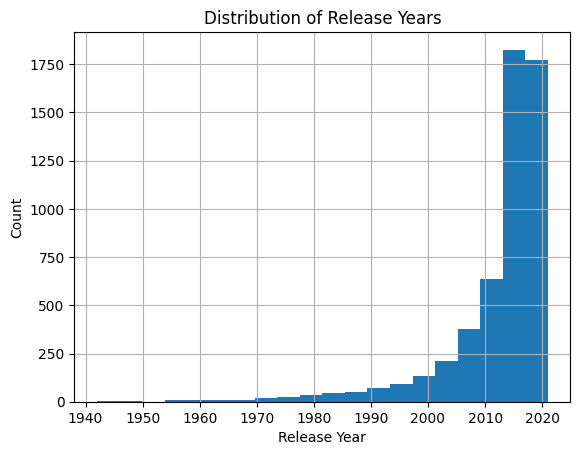

In [53]:
#Hist Distribution of Release Years
data["release_year"].hist(bins=20)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

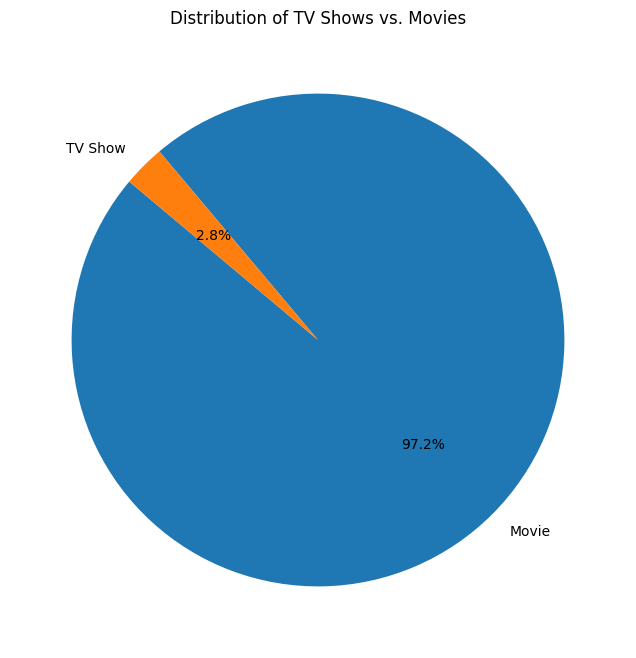

In [54]:
type_count=data["type"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of TV Shows vs. Movies")
plt.show()

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: count, dtype: int64


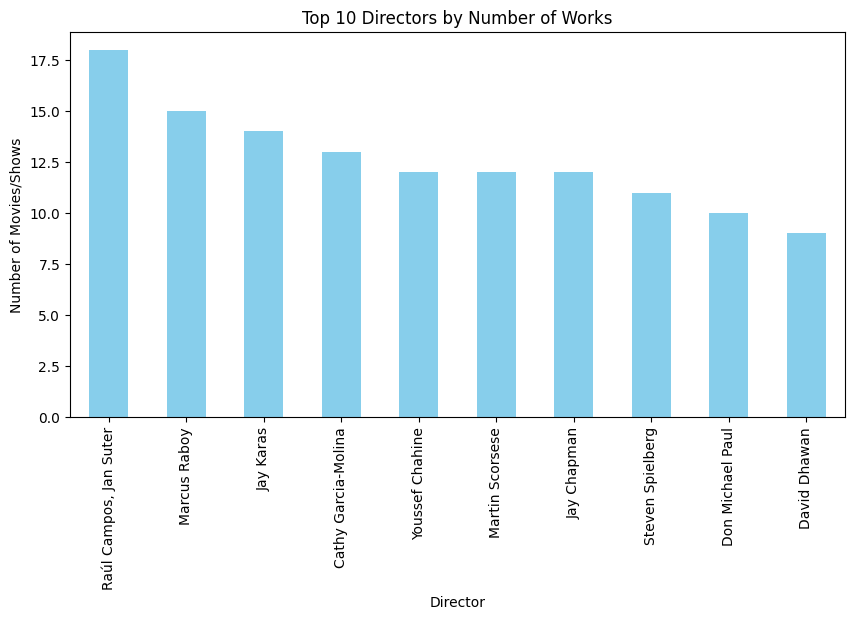

In [63]:
director_performance = data["director"].value_counts()
print(director_performance.head(10))  # Show top 10 directors

# Select top 10 directors
top_directors = director_performance.head(10)

# Plot Bar Chart
plt.figure(figsize=(10, 5))
top_directors.plot(kind="bar", color="skyblue")
plt.xlabel("Director")
plt.ylabel("Number of Movies/Shows")
plt.title("Top 10 Directors by Number of Works")
plt.show()

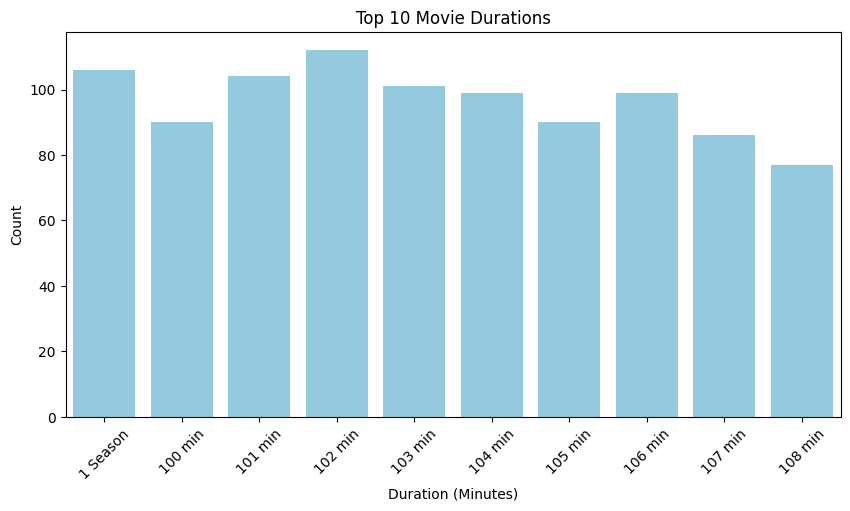

In [70]:
# Count duration occurrences
duration_counts = data["duration"].value_counts().sort_index(ascending=True)

# Plot Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=duration_counts.index[:10], y=duration_counts.values[:10], color="skyblue")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.title("Top 10 Movie Durations")
plt.xticks(rotation=45)
plt.show()

In [71]:
# Separate Movies and TV Shows
movies = data[data["type"] == "Movie"].copy()
tv_shows = data[data["type"] == "TV Show"].copy()


In [ ]:
# Extract numeric values from duration
movies["duration"] = movies["duration"].str.extract("(\d+)").astype(float)
tv_shows["duration"] = tv_shows["duration"].str.extract("(\d+)").astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HCRMN\AppData\Local\Temp\ipykernel_11204\92091037.py:1: SyntaxWarning: invalid escape sequence '\d'
  movies["duration"] = movies["duration"].str.extract("(\d+)").astype(float)
C:\Users\HCRMN\AppData\Local\Temp\ipykernel_11204\92091037.py:2: SyntaxWarning: invalid escape sequence '\d'
  tv_shows["duration"] = tv_shows["duration"].str.extract("(\d+)").astype(float)


In [76]:
tv_shows.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9.0,"British TV Shows, Reality TV"
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Dramas"
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Dramas"


In [78]:
movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies"


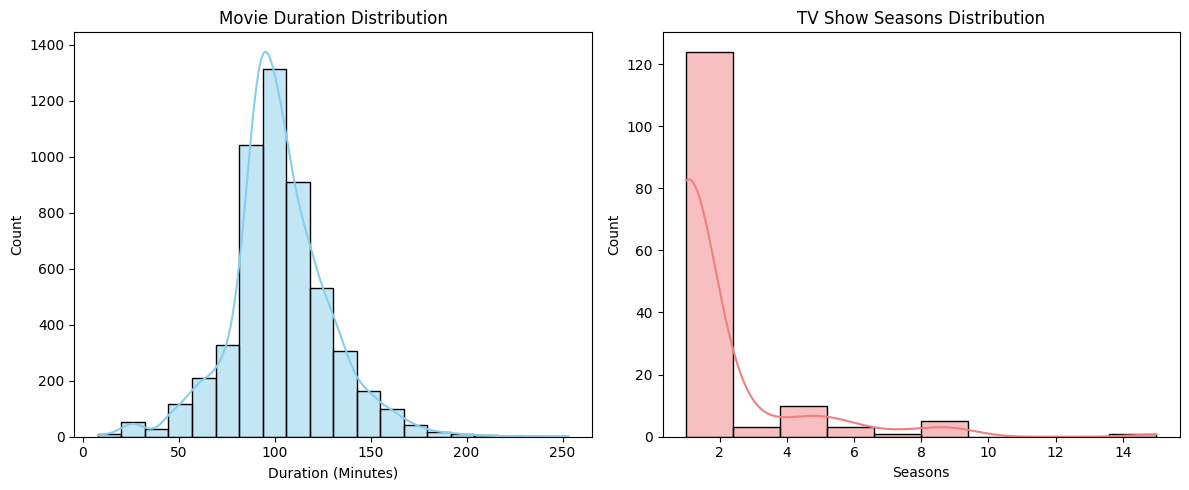

In [80]:
# Create subplots for Movies and TV Shows
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Movie Duration Distribution
sns.histplot(movies["duration"], bins=20, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Movie Duration Distribution")
axes[0].set_xlabel("Duration (Minutes)")
axes[0].set_ylabel("Count")

# TV Show Season Distribution
sns.histplot(tv_shows["duration"], bins=10, kde=True, color="lightcoral", ax=axes[1])
axes[1].set_title("TV Show Seasons Distribution")
axes[1].set_xlabel("Seasons")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [88]:
data["duration_numeric"] = data["duration"].str.extract("(\d+)").astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HCRMN\AppData\Local\Temp\ipykernel_11204\2755806238.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["duration_numeric"] = data["duration"].str.extract("(\d+)").astype(float)


In [93]:
highest_movie = data[data["type"] == "Movie"].nlargest(1, "duration_numeric")
print(highest_movie[["title", "type", "duration"]])

                       title   type duration
2491  The School of Mischief  Movie  253 min


In [90]:
# Find the longest TV show (most seasons)
highest_tv_show = data[data["type"] == "TV Show"].nlargest(1, "duration_numeric")
print(highest_tv_show[["title", "type", "duration"]])

             title     type    duration
2423  Supernatural  TV Show  15 Seasons


In [91]:
highest_tv_show = data[data["type"] == "TV Show"].nlargest(1, "duration_numeric")

In [95]:
highest_movie_tv_show = pd.concat([highest_movie, highest_tv_show])
print(highest_movie_tv_show[["title", "type", "duration"]])

                       title     type    duration
2491  The School of Mischief    Movie     253 min
2423            Supernatural  TV Show  15 Seasons


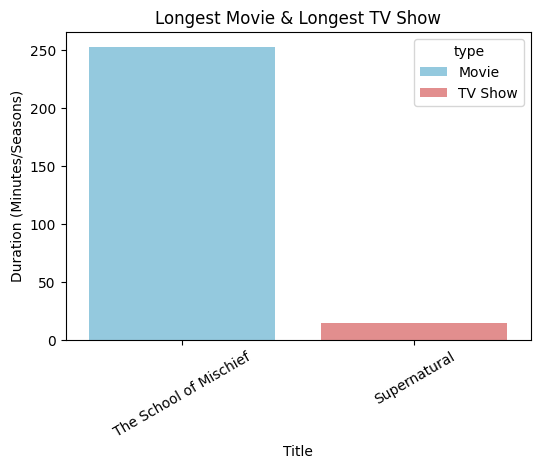

In [96]:
plot_data = highest_movie_tv_show[["title", "duration_numeric", "type"]]

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=plot_data["title"], y=plot_data["duration_numeric"], hue=plot_data["type"], palette=["skyblue", "lightcoral"])
plt.xlabel("Title")
plt.ylabel("Duration (Minutes/Seasons)")
plt.title("Longest Movie & Longest TV Show")
plt.xticks(rotation=30)
plt.show()

In [97]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'duration_numeric'],
      dtype='object')

In [100]:
top_10_longest_movies = data[data["type"] == "Movie"].nlargest(10, "duration_numeric")
print(top_10_longest_movies[["title", "duration_numeric"]])

                             title  duration_numeric
2491        The School of Mischief             253.0
2487                No Longer kids             237.0
166    Once Upon a Time in America             229.0
7932                        Sangam             228.0
1019                        Lagaan             224.0
4573                  Jodhaa Akbar             214.0
2731      Kabhi Khushi Kabhie Gham             209.0
3227                  The Irishman             209.0
2632  No Direction Home: Bob Dylan             208.0
8327            The Gospel of Luke             205.0


In [101]:
top_10_recent_movies = data[data["type"] == "Movie"].nlargest(10, "release_year")
print(top_10_recent_movies[["title", "release_year"]])

                                    title  release_year
9                            The Starling          2021
12                           Je Suis Karl          2021
81                                   Kate          2021
190                            Thimmarusu          2021
231                         The Water Man          2021
247                            Sweet Girl          2021
270                               Beckett          2021
278           Lokillo: Nothing's the Same          2021
279  Monster Hunter: Legends of the Guild          2021
284                   The Kissing Booth 3          2021


C:\Users\HCRMN\AppData\Local\Temp\ipykernel_11204\2500888031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_longest_movies["duration_numeric"], y=top_10_longest_movies["title"], palette="coolwarm")


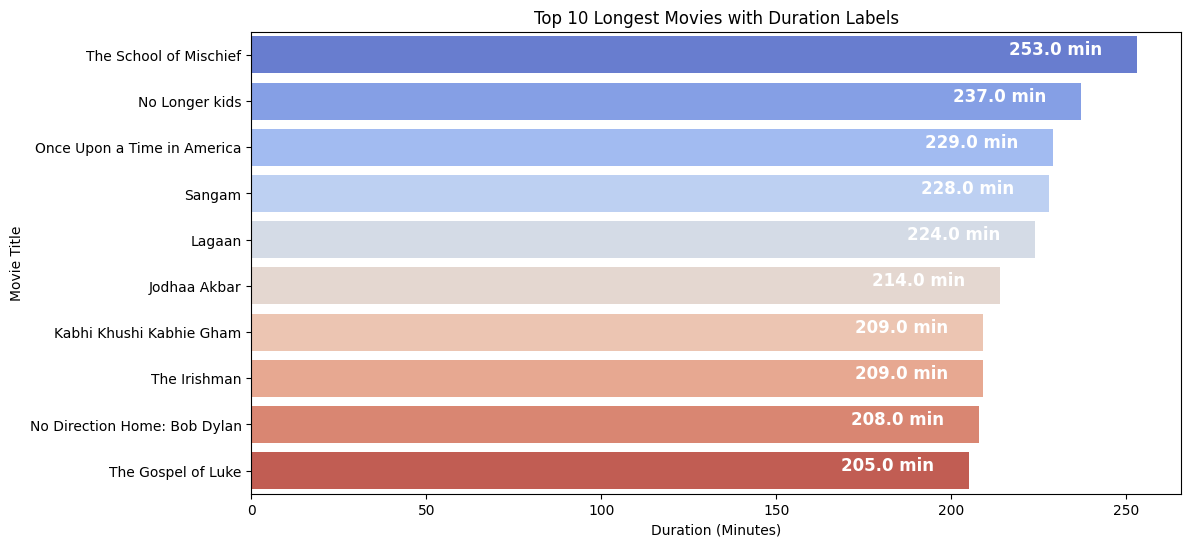

In [103]:
# Select Top 10 Longest Movies
top_10_longest_movies = data[data["type"] == "Movie"].nlargest(10, "duration_numeric")

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_longest_movies["duration_numeric"], y=top_10_longest_movies["title"], palette="coolwarm")

# Add Labels (Inside & Outside)
for index, value in enumerate(top_10_longest_movies["duration_numeric"]):
    if value > 150:  # If duration is long, put the label inside
        ax.text(value - 10, index, f"{value} min", ha='right', fontsize=12, color="white", weight="bold")
    else:  # If duration is short, put the label outside
        ax.text(value + 2, index, f"{value} min", ha='left', fontsize=12, color="black", weight="bold")

# Labels & Titles
plt.xlabel("Duration (Minutes)")
plt.ylabel("Movie Title")
plt.title("Top 10 Longest Movies with Duration Labels")
plt.show()

In [106]:
top_10_longest_tv_shows = data[data["type"] == "TV Show"].nlargest(10, "duration_numeric")
print(top_10_longest_tv_shows[["title", "duration_numeric"]])

                                 title  duration_numeric
2423                      Supernatural              15.0
8        The Great British Baking Show               9.0
1998                  Call the Midwife               9.0
3541                            Naruto               9.0
2947                             Arrow               8.0
7896                       Royal Pains               8.0
380                          The Flash               7.0
1173                  Men on a Mission               6.0
3653  Comedians in Cars Getting Coffee               6.0
6742                      Father Brown               6.0


C:\Users\HCRMN\AppData\Local\Temp\ipykernel_11204\646119308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_longest_tv_shows["duration_numeric"], y=top_10_longest_tv_shows["title"], palette="coolwarm")


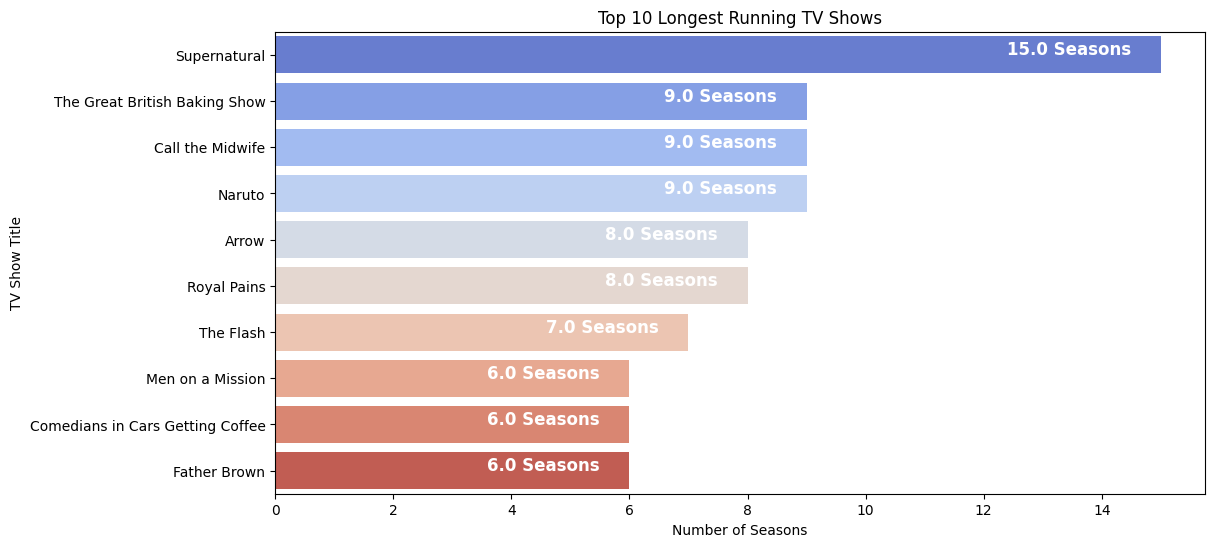

In [111]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_longest_tv_shows["duration_numeric"], y=top_10_longest_tv_shows["title"], palette="coolwarm")

# Add Labels (Inside & Outside)
for index, value in enumerate(top_10_longest_tv_shows["duration_numeric"]):
    if value > 5:  # If seasons are high, label inside
        ax.text(value - 0.5, index, f"{value} Seasons", ha='right', fontsize=12, color="white", weight="bold")
    else:  # If seasons are low, label outside
        ax.text(value + 0.5, index, f"{value} Seasons", ha='left', fontsize=12, color="black", weight="bold")

# Labels & Titles
plt.xlabel("Number of Seasons")
plt.ylabel("TV Show Title")
plt.title("Top 10 Longest Running TV Shows")
plt.show()

In [108]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'duration_numeric'],
      dtype='object')

In [112]:
# Convert 'duration_numeric' to numeric (if not already)
data["duration_numeric"] = pd.to_numeric(data["duration_numeric"], errors="coerce")

# Group by director and sum the total duration of their works
top_10_directors_by_duration = data.groupby("director")["duration_numeric"].sum().nlargest(10)
print(top_10_directors_by_duration)


director
Martin Scorsese           1731.0
Cathy Garcia-Molina       1537.0
Youssef Chahine           1482.0
Steven Spielberg          1468.0
David Dhawan              1248.0
Ashutosh Gowariker        1165.0
Raúl Campos, Jan Suter    1145.0
Sooraj R. Barjatya        1067.0
Quentin Tarantino         1042.0
Don Michael Paul          1010.0
Name: duration_numeric, dtype: float64


C:\Users\HCRMN\AppData\Local\Temp\ipykernel_11204\3930415413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


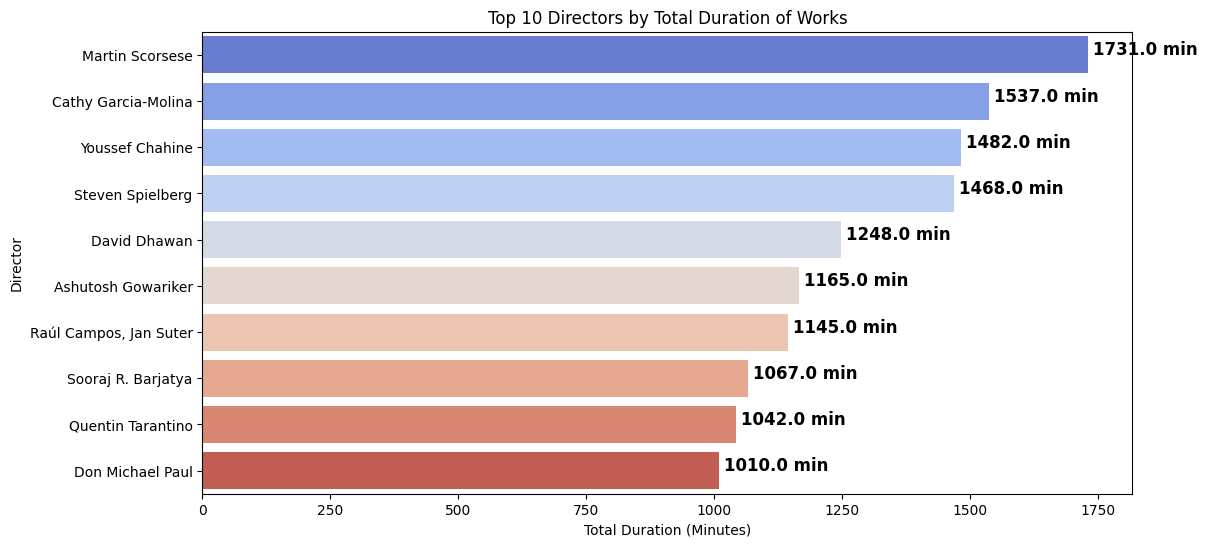

In [114]:
# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_10_directors_by_duration.values, 
    y=top_10_directors_by_duration.index, 
    palette="coolwarm"
)

# Add labels above bars
for index, value in enumerate(top_10_directors_by_duration.values):
    ax.text(value + 10, index, f"{value} min", ha='left', fontsize=12, weight="bold")

# Labels & Titles
plt.xlabel("Total Duration (Minutes)")
plt.ylabel("Director")
plt.title("Top 10 Directors by Total Duration of Works")
plt.show()